In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from itertools import combinations
from random import randrange

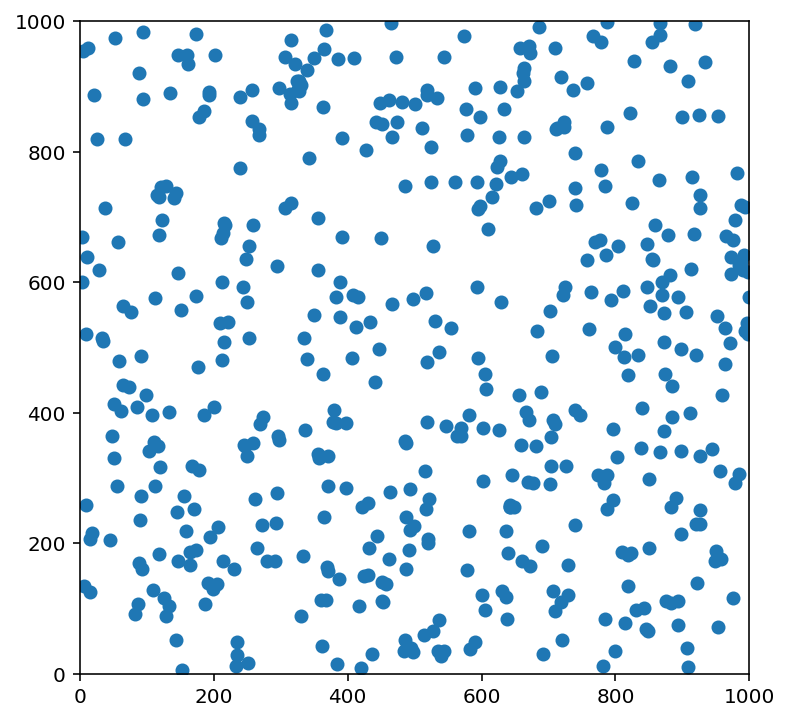

In [2]:
X = np.random.randint(0, 1000, 1000).reshape(-1, 2)
m = X.shape[0]
plt.figure(figsize=(6,6))
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.scatter(X[:, 0], X[:, 1]);

In [3]:
# Reduce <X> to <target_size> by eliminating similar features,
# using <distance> as a metric, via an iterative, stochastic
# sampling of <num_subsamples> and eliminating <num_eliminate>
# features at each iteration
def reduce(X, target_size, num_subsample, num_eliminate, distance):
    modulo = 200
    while (len_X := len(X)) > target_size:
        x1, x2 = (randrange(len_X), randrange(len_X))
        distances = [(0, distance(X[x1], X[x2]))]
        for _ in range(num_subsample):
            x1, x2 = (randrange(len_X), randrange(len_X))
            if x1 == x2: continue
            dist = distance(X[x1], X[x2])
            if dist < distances[-1][1]:
                distances.append((x1, dist))
        eliminate = [tup[0] for tup in distances[-num_eliminate:]]
        X = np.delete(X, eliminate, axis=0)
        modulo -= 1
        if (modulo == 0):
            print(len_X, end=' ')
            modulo = 200
    print()
    return X

In [4]:
# Euclidean Distance
def distance(x1, x2):
    return np.linalg.norm(x1 - x2)

In [5]:
X1 = X.copy()
%time X1 = reduce(X1, 50, 2000, 2, distance)

105 
CPU times: user 3.43 s, sys: 14.8 ms, total: 3.45 s
Wall time: 3.44 s


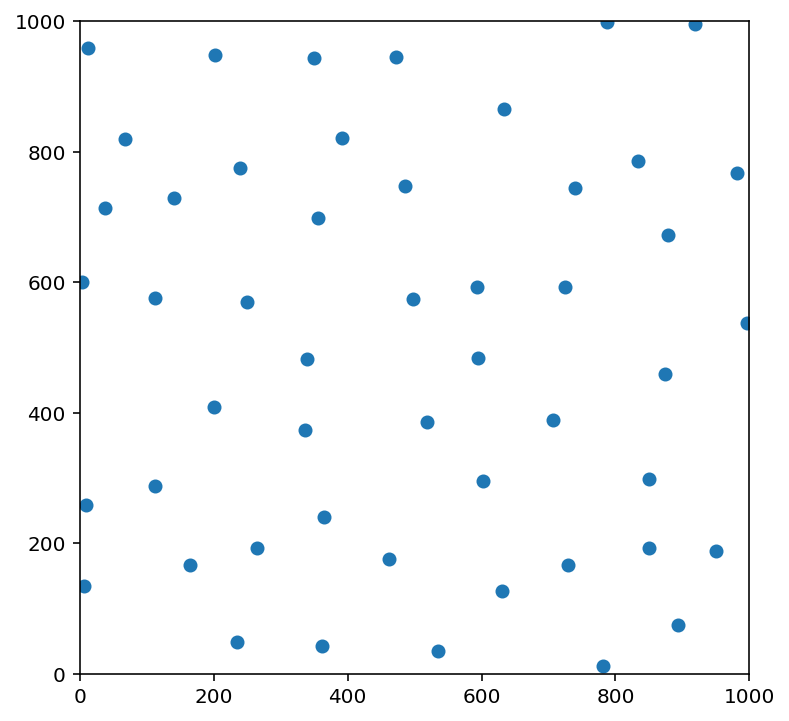

In [6]:
plt.figure(figsize=(6,6))
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.scatter(X1[:, 0], X1[:, 1]);

- Above shows 500 features (points) reduced to 50 'landmark' features using the L2^2 similarity metric